In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pickle

In [4]:
from Generator import StreamGenerator, ClusterPoints

In [5]:
np.random.seed(0)

# Generate parent dataset
### Create the generator

In [6]:
sg = StreamGenerator(weights = np.ones(10) * 1./10,
                     number_points = 1000,
                     dimensionality = 10,
                     min_projected_dim = 8,
                     max_projected_dim = 10,
                     min_coordinate = -10,
                     max_coordinate = 10,
                     min_projected_dim_var = 0.1,
                     max_projected_dim_var = 0.5,
                     )

[-0.97627008 -4.30378733 -2.05526752 -0.89766366  1.52690401 -2.91788226
  1.24825577 -7.83546002 -9.27325521  2.33116962]
[-2.79842043  7.13293425 -8.89337834 -0.43696644  1.7067612   4.70888776
 -5.48467379  0.87699336 -1.36867898  9.62420399]
[-2.68548116 -9.17898537 -3.05580634 -2.70117747 -9.90599135 -1.63700659
  1.71262824  0.50604995 -2.47020202  3.2398477 ]
[ 4.07719605  7.62544562  3.64033641  1.71474011  8.71705007 -3.84944239
 -1.33202908  4.69221018 -0.46496107  8.12118978]
[-5.12213388  2.07803449 -7.92076775 -2.77842152 -7.83108874 -3.60111139
  1.01604524 -9.57141857  7.67596181 -5.34047407]
[-7.56904381  7.94273283  8.15252221  2.91906676 -1.03632518  9.32749813
 -9.37923531  3.58005517  5.5747463   7.1747219 ]
[ 1.85633406  8.61666009 -3.94857546  0.92914635 -4.44111199 -7.32764652
 -9.5104301  -7.11606685  9.76571832  2.80043871]
[-9.84792798  4.65474924 -3.58181231 -7.28562885 -5.01688491 -9.28979536
 -1.0848487   5.75219002  5.55113551  5.62501253]
[ 0.61005634  0.

### Save the generator

In [7]:
pickle.dump(sg,open("synthetic_datasets/source/source_generator.pickle","wb"))

### Create the source dataset

In [8]:
stream_ss,stream_df = sg.get_full_dataset(5000)

### Save the source datasel

In [9]:
stream_df.to_csv("synthetic_datasets/source/source_D10_C10_Projected_8-10_df.csv")
#stream_ss.to_csv("synthetic_datasets/source_D10_C10_Projected_8-10_ss.csv")

# Train a model to separate the dataset

In [10]:
from sklearn import tree
clf = tree.DecisionTreeClassifier()

In [11]:
features = range(10)
clf = clf.fit(stream_df[features], stream_df["cluster"])

### Save tree

In [12]:
pickle.dump(clf,open("source_models/source_D10_C10_Projected_8-10_model.pickle","wb"))

### Visualize

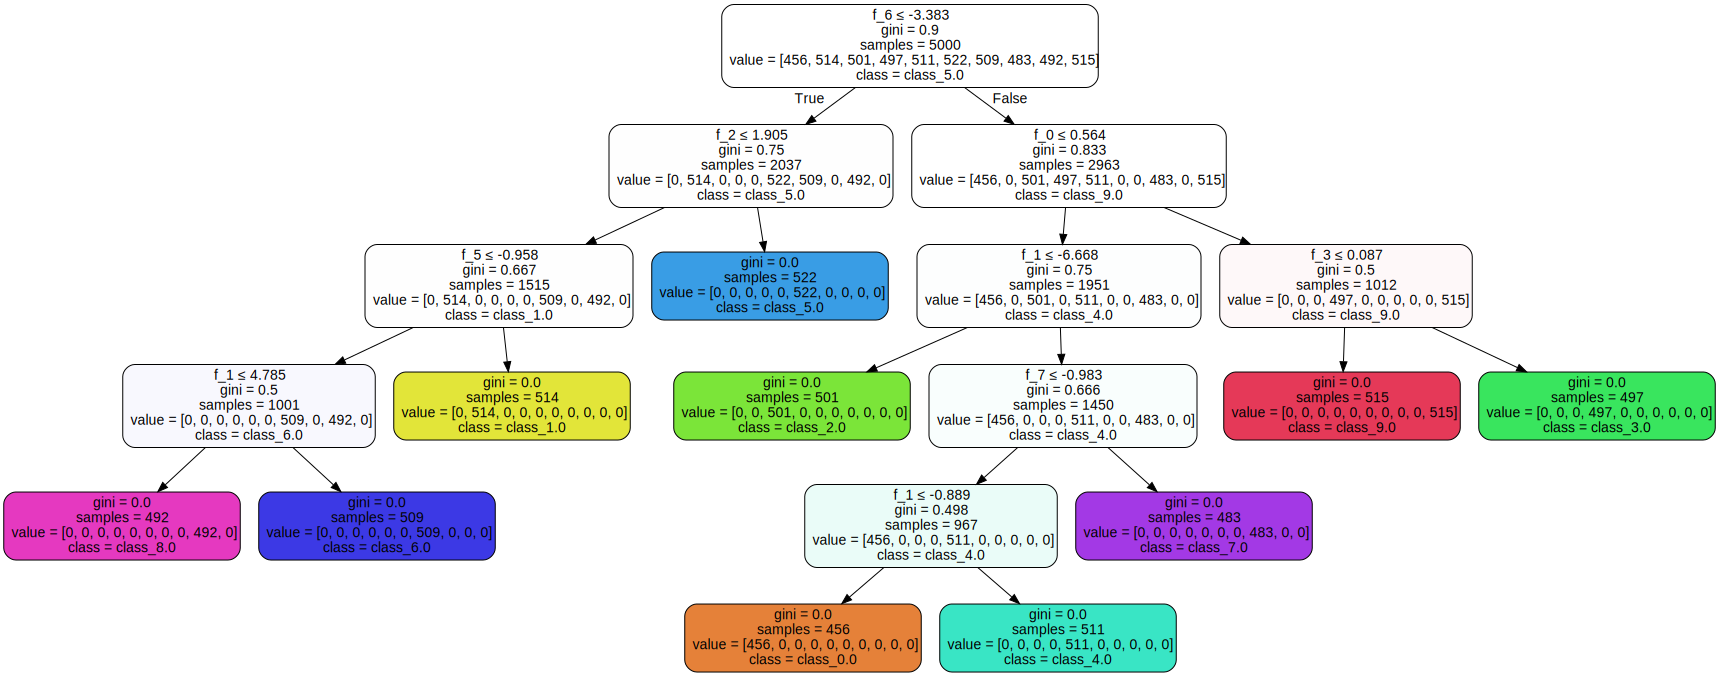

In [13]:
import graphviz 
dot_data = tree.export_graphviz(clf, out_file=None, 
                         feature_names=["f_"+`f` for f in features],  
                         class_names=["class_"+`c` for c in np.unique(stream_df.cluster)],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)  
graph.render('source_tree.gv', view=False)
graph

### Feature importance

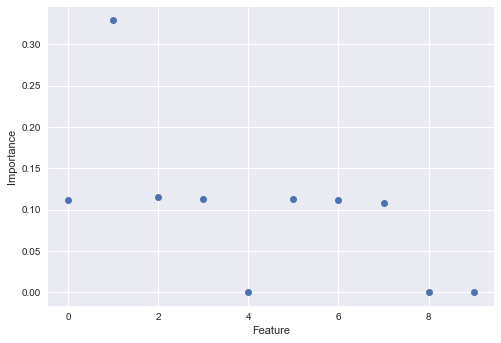

In [14]:
plt.plot(clf.feature_importances_,"o")
plt.xlabel("Feature")
plt.ylabel("Importance")

# Destroy one feature at a time
One of the features is chosen and every coordinate is then chosen uniformly along these feature

In [15]:
import copy

In [16]:
from Changes import loose_feature

In [17]:
for dimension in range(10):
    sg_copy = copy.deepcopy(sg)
    loose_feature(sg_copy.clusters, {i:[dimension] for i in range(10)})
    stream_ss,stream_df = sg_copy.get_full_dataset(5000)
    pickle.dump(sg_copy,open("synthetic_datasets/target/target_generator_erase_feature_"+str(dimension)+".pickle","wb"))
    stream_df.to_csv("synthetic_datasets/target/target_D10_C10_Projected_8-10_df_erase_feature_"+str(dimension)+".csv")
    #stream_ss.to_csv("synthetic_datasets/source_D10_C10_Projected_8-10_ss_erase_feature_"+str(dimension)+".csv")
    

# Change Cluster Weight

+ One of the clusters get very few points
+ One of the clusters get few points

In [18]:
from Changes import change_cluster_weight

In [19]:
for cluster in range(10):
    sg_copy = copy.deepcopy(sg)
    change_cluster_weight(sg_copy.clusters,clusters_weights={cluster:0.01})
    stream_ss,stream_df = sg_copy.get_full_dataset(5000)
    pickle.dump(sg_copy,open("synthetic_datasets/target/target_generator_smaller_cluster_"+str(cluster)+".pickle","wb"))
    stream_df.to_csv("synthetic_datasets/target/target_D10_C10_Projected_8-10_df_smaller_cluster_"+str(cluster)+".csv")

In [20]:
for cluster in range(10):
    sg_copy = copy.deepcopy(sg)
    change_cluster_weight(sg_copy.clusters,clusters_weights={cluster:1.0})
    stream_ss,stream_df = sg_copy.get_full_dataset(5000)
    pickle.dump(sg_copy,open("synthetic_datasets/target/target_generator_bigger_cluster_"+str(cluster)+".pickle","wb"))
    stream_df.to_csv("synthetic_datasets/target/target_D10_C10_Projected_8-10_df_bigger_cluster_"+str(cluster)+".csv")

# Include Dimension
For every cluster make one of the features at a time very separable

In [21]:
from Changes import gain_feature

In [22]:
for dimension in range(10):
    sg_copy = copy.deepcopy(sg)
    gain_feature(sg_copy.clusters, {i:[dimension] for i in range(10)})
    stream_ss,stream_df = sg_copy.get_full_dataset(5000)
    pickle.dump(sg_copy,open("synthetic_datasets/target/target_generator_gain_feature_"+str(dimension)+".pickle","wb"))
    stream_df.to_csv("synthetic_datasets/target/target_D10_C10_Projected_8-10_df_gain_feature_"+str(dimension)+".csv")


# Apply Drift
Apply a speed vector $\sim \mathcal{N}(0,1)$ along one dimension at a time

In [23]:
from Changes import apply_drift

In [24]:
for dimension in range(10):
    sg_copy = copy.deepcopy(sg)
    apply_drift(sg_copy.clusters, {cluster:{dimension:np.random.randn(1)[0]} for cluster in range(10)}, -20, 20)
    stream_ss,stream_df = sg_copy.get_full_dataset(5000)
    pickle.dump(sg_copy,open("synthetic_datasets/target/target_generator_drift_feature_"+str(dimension)+".pickle","wb"))
    stream_df.to_csv("synthetic_datasets/target/target_D10_C10_Projected_8-10_df_drift_feature_"+str(dimension)+".csv")


# Apply Density Change
Replace the cluster radius by a number between 0.5 and 2 uniformly along each dimension

In [25]:
from Changes import apply_density_change

In [26]:
for dimension in range(10):
    sg_copy = copy.deepcopy(sg)
    apply_density_change(sg_copy.clusters, {cluster:{dimension:np.random.random(1)[0]*1.5+0.5} for cluster in range(10)})
    stream_ss,stream_df = sg_copy.get_full_dataset(5000)
    pickle.dump(sg_copy,open("synthetic_datasets/target/target_generator_density_feature_"+str(dimension)+".pickle","wb"))
    stream_df.to_csv("synthetic_datasets/target/target_D10_C10_Projected_8-10_df_density_feature_"+str(dimension)+".csv")
